In [269]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rc(
    "figure",
    autolayout=True,
    figsize=(16, 9),
    titlesize=18,
    titleweight='bold',
)
%config InlineBackend.figure_format = 'retina'

In [270]:
cap = cv2.VideoCapture("dashcam1.webm")

cap.set(cv2.CAP_PROP_POS_FRAMES, 5)

ret, frame = cap.read()

cap.release()

In [271]:
frame_cropped = frame[900:-100, 500:2500, ::]

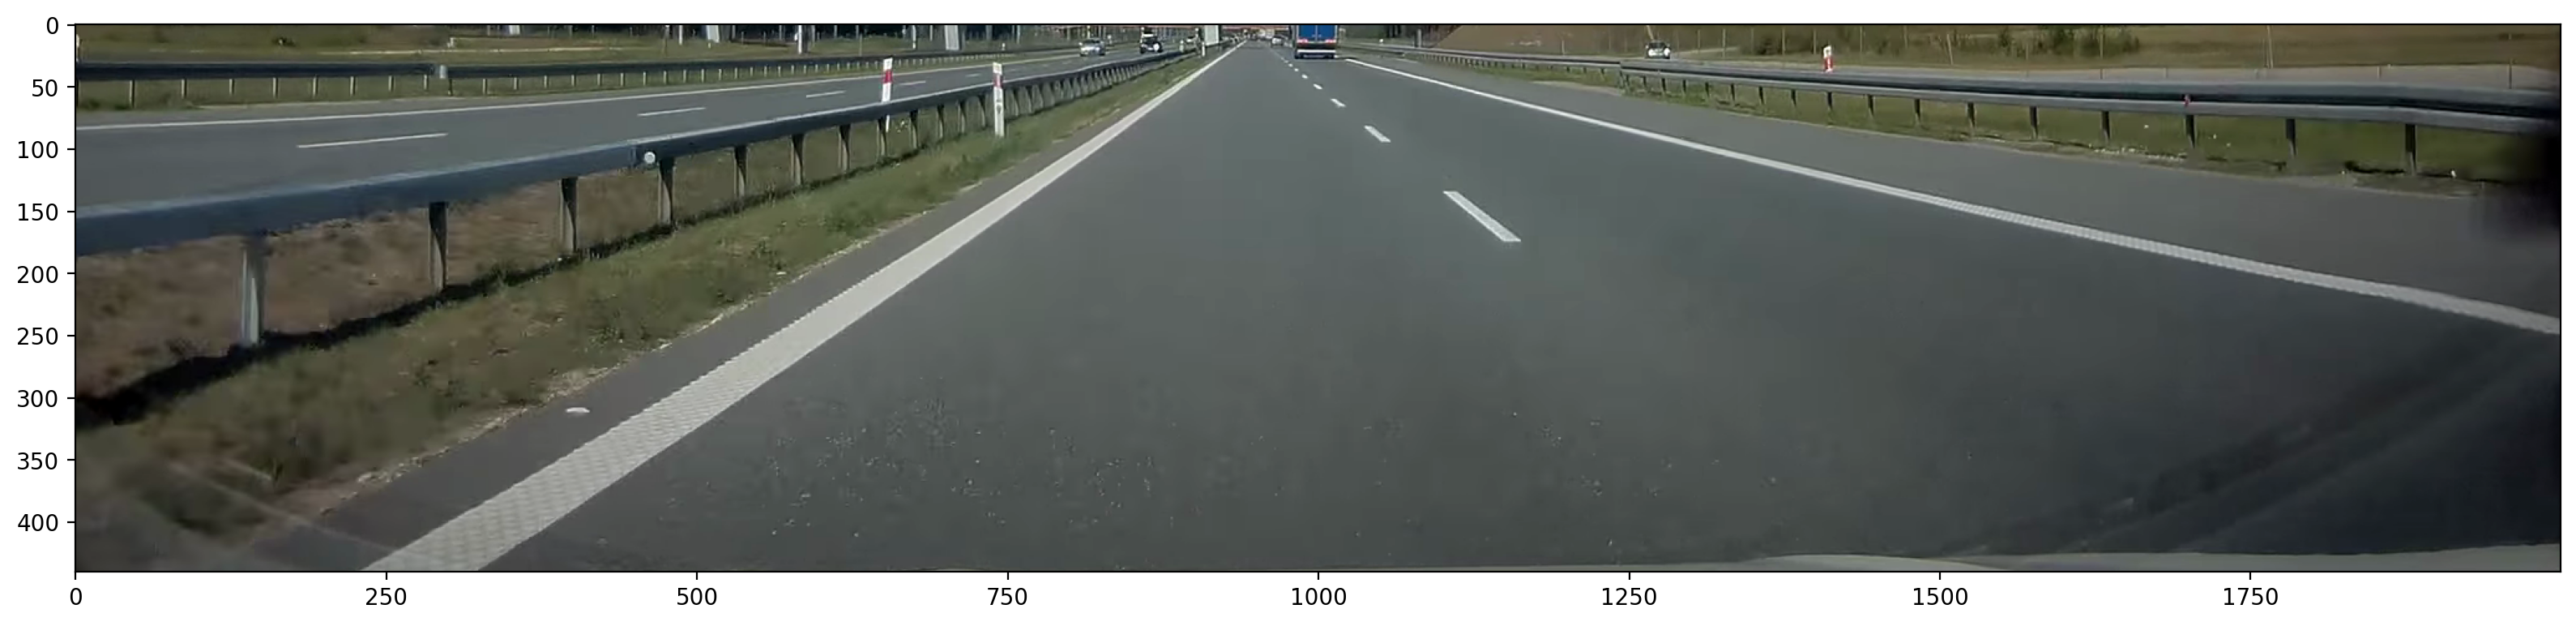

In [272]:
frame_rgb = frame_cropped[:,:,::-1]

plt.imshow(frame_rgb)

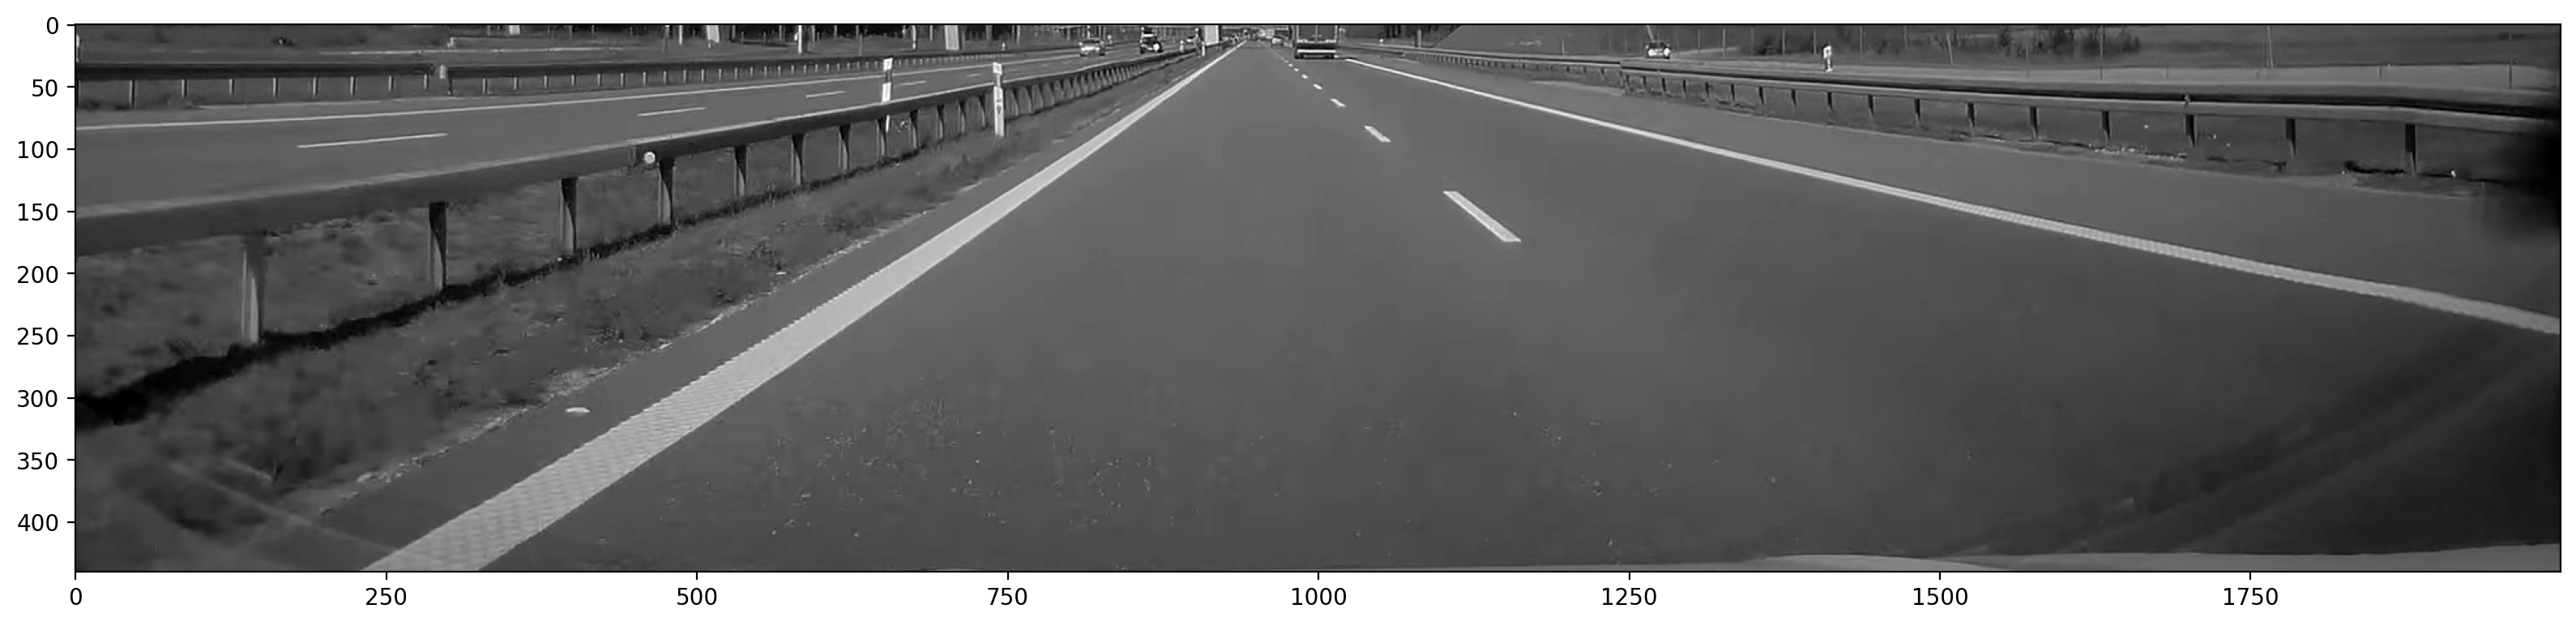

In [273]:
gray_frame = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_frame, cmap='gray')

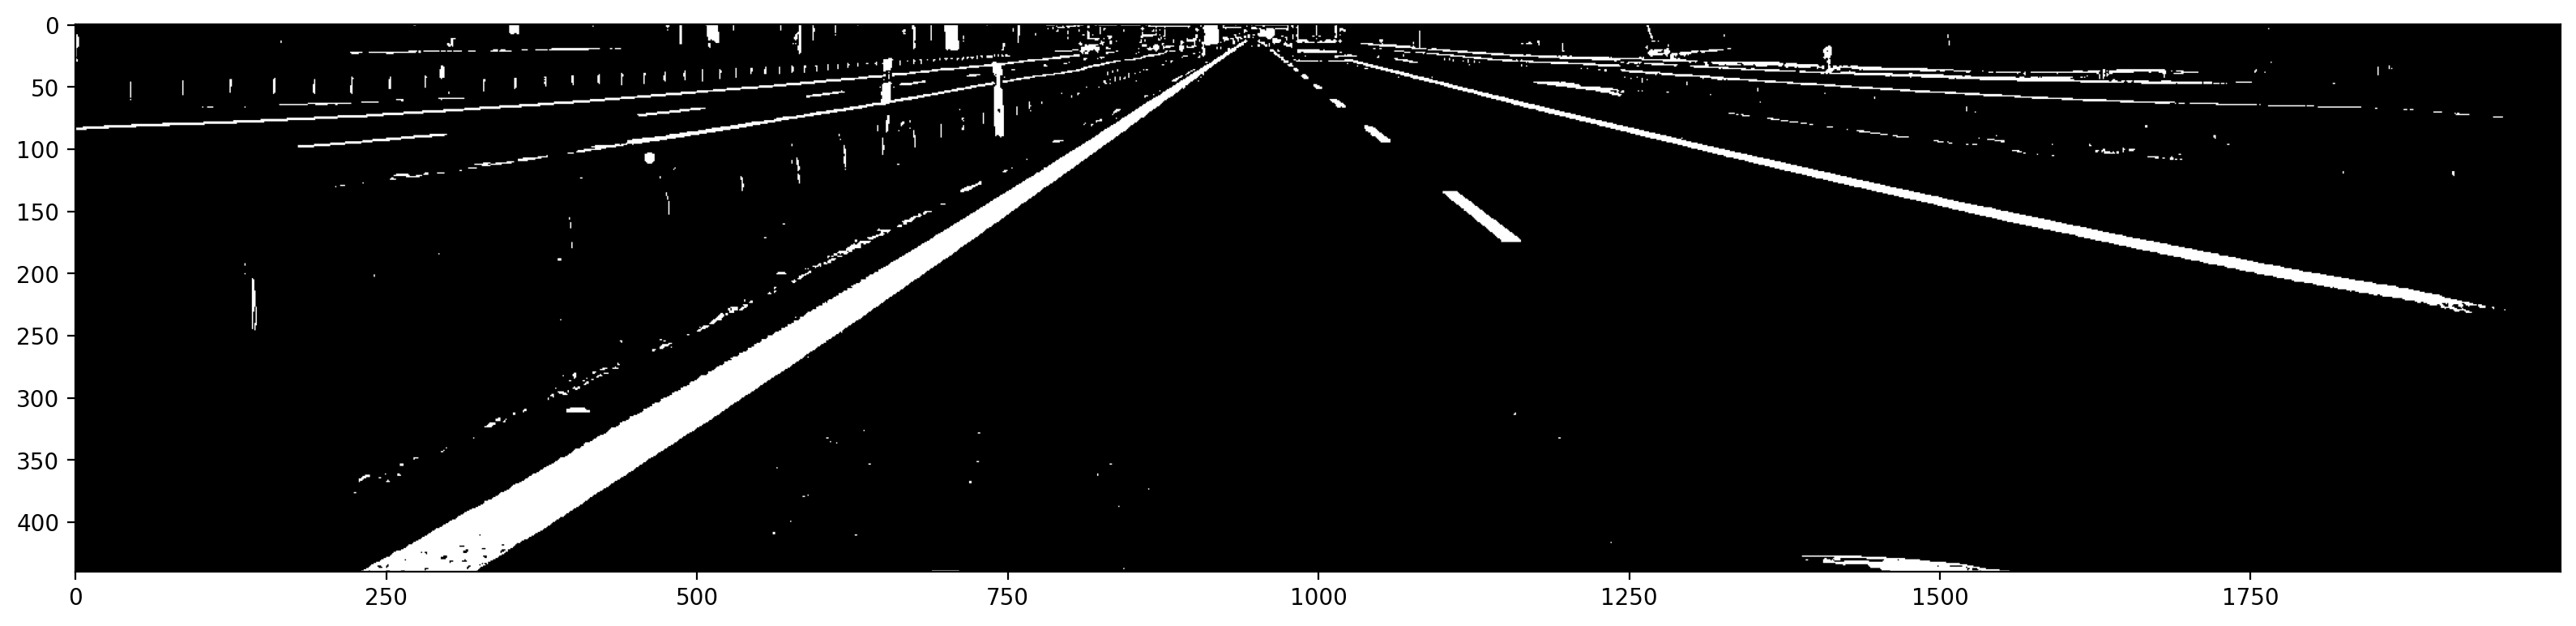

In [274]:
ret, th1 = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

plt.imshow(th1, cmap='gray')

In [275]:
pts1 = np.float32([[941, 13], [955, 13],
                 [270, 410], [1486, 410]])

left = 200
d = 20000

pts2 = np.float32([[left, 0], [200+left, 0],
                   [left, d], [200+left, d]])

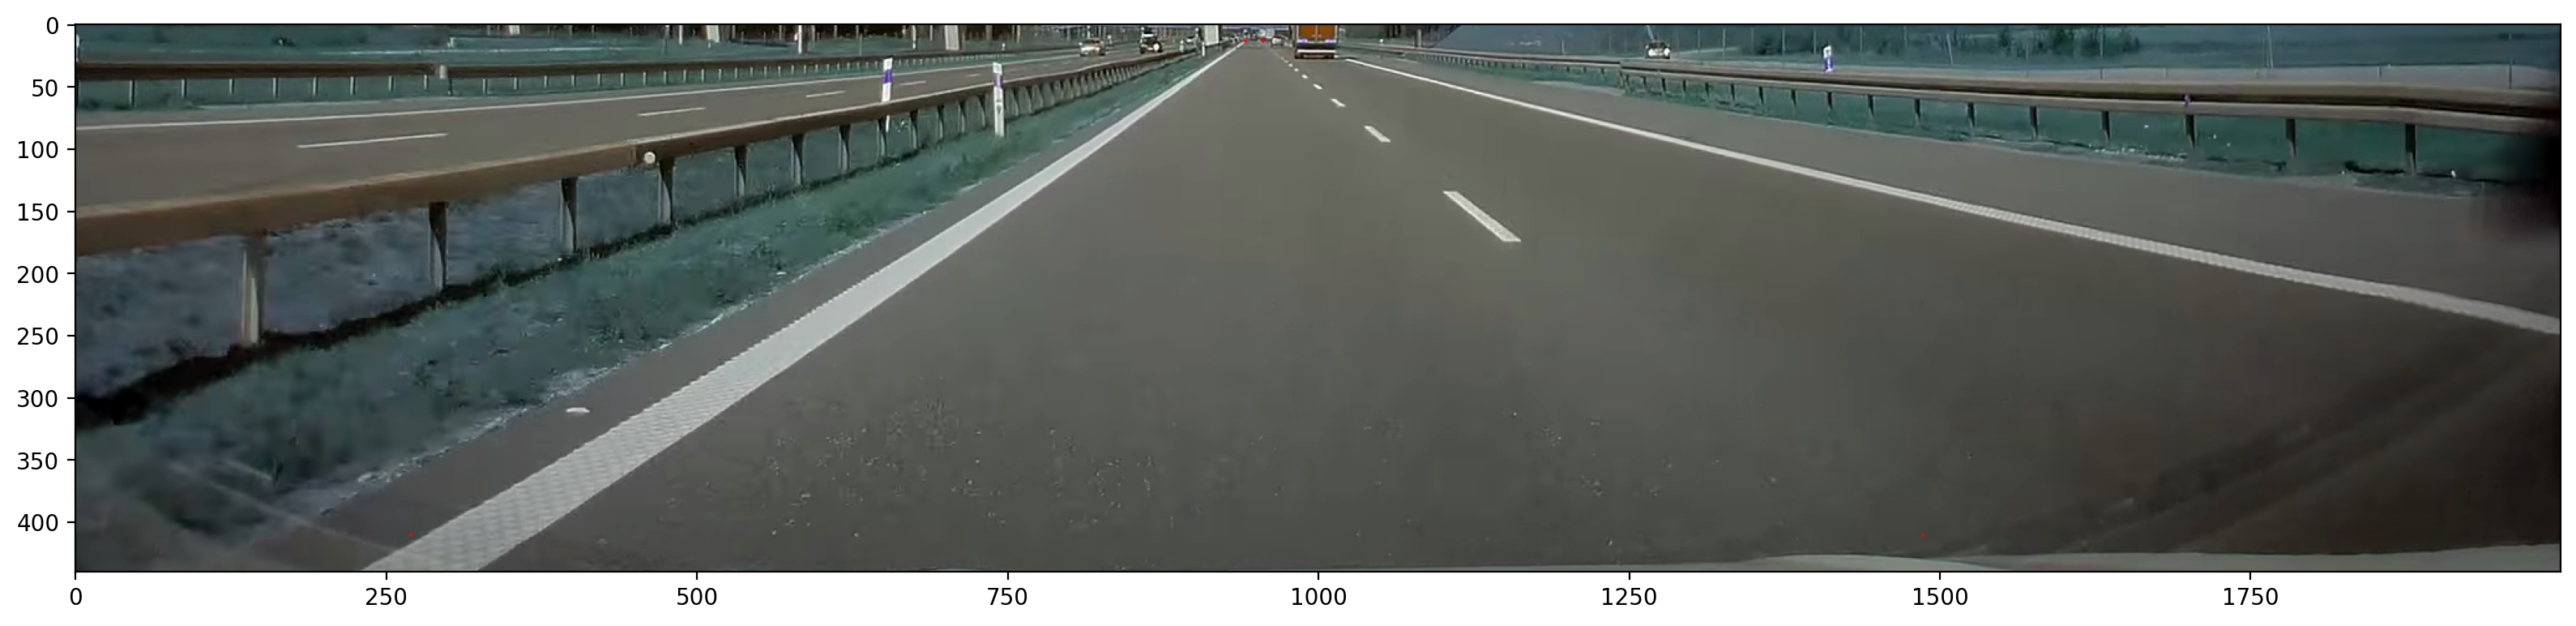

In [276]:
preview_points = frame_cropped.copy()

for p in pts1:
    x = int(p[0])
    y = int(p[1])
    test = cv2.circle(preview_points, (x,y), 3, (255, 0, 0), -1)

plt.imshow(preview_points)

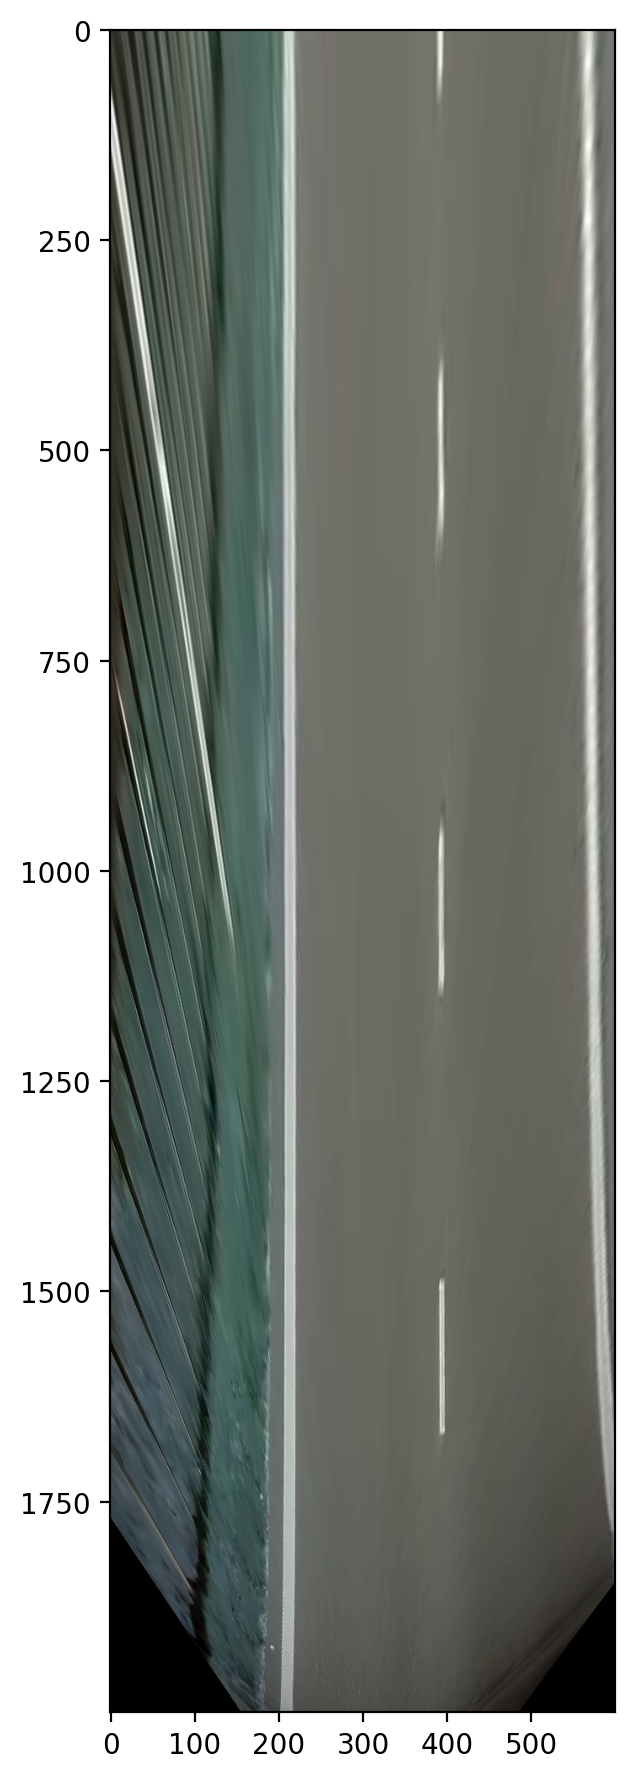

In [282]:
frame_input = frame_cropped.copy()

matrix = cv2.getPerspectiveTransform(pts1, pts2)
bird_eye_view = cv2.warpPerspective(frame_input, matrix, (600, d))

plt.imshow(bird_eye_view[-2000:,:])

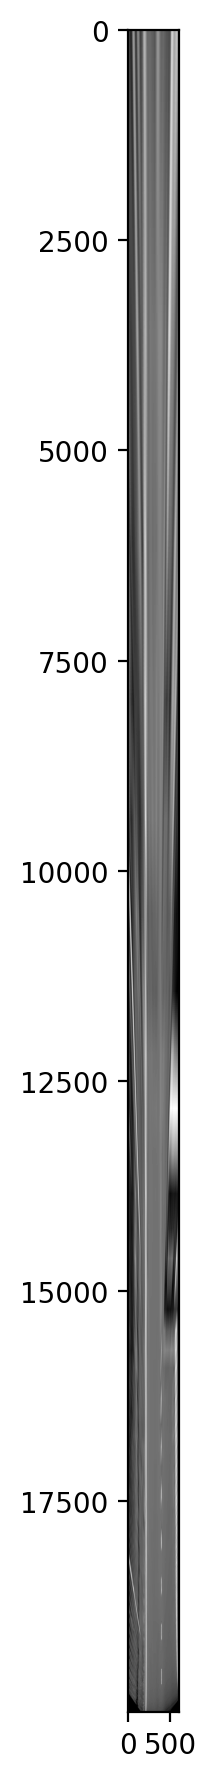

In [283]:
gray_bird_eye_view = cv2.cvtColor(bird_eye_view, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_bird_eye_view, cmap='gray')

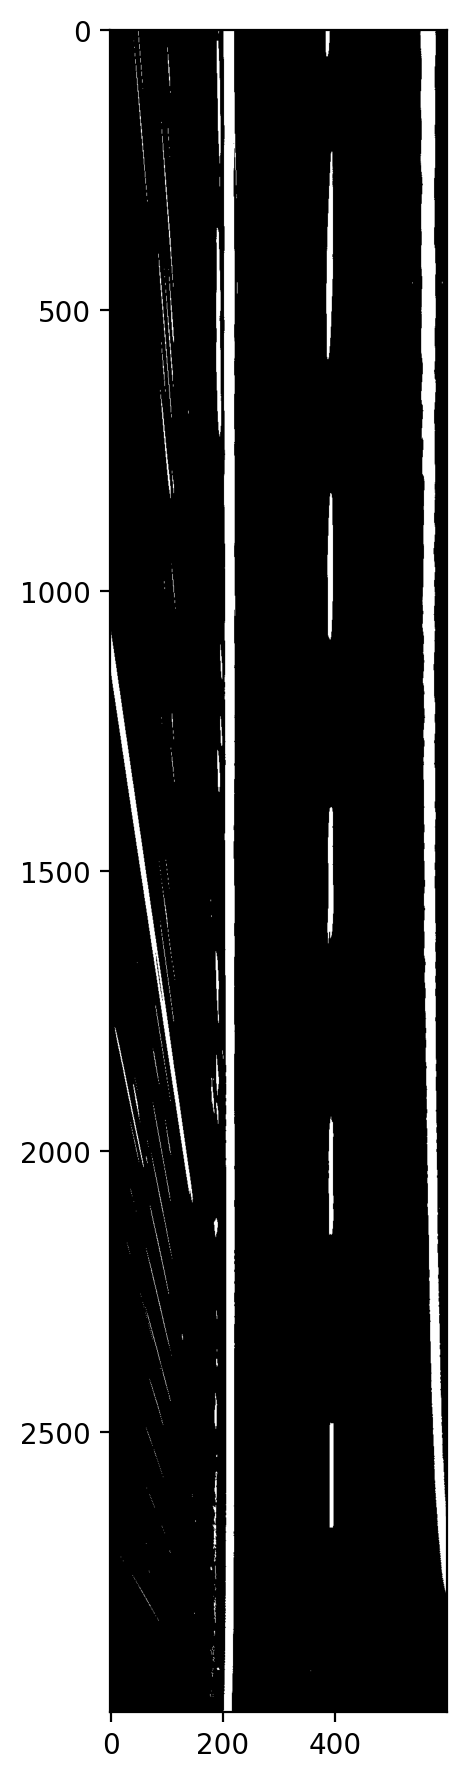

In [285]:
ret, th_bev = cv2.threshold(gray_bird_eye_view, 127, 255, cv2.THRESH_BINARY)

plt.imshow(th_bev[-3000:,:], cmap='gray')